# Random Forests

In [1]:
import pandas as pd
train_data = pd.read_csv("data/landsat_train_small.csv",header=None)

In [2]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,6,2696,2416,2179,1412,3882,1988,1407,1025,4867
1,6,2691,2413,2177,1406,3879,1986,1408,1023,4856
2,6,2690,2413,2178,1404,3880,1988,1411,1023,4852
3,6,2691,2415,2184,1405,3878,1998,1420,1025,4851
4,6,2706,2428,2201,1413,3891,2021,1436,1033,4874


In [3]:
# Range
train_data[0].unique()

array([6, 7, 3, 4, 5, 2, 8])

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_features=None)
rf.fit(train_data[[1,2,3,4,5,6,7,8,9]],train_data[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
del train_data

In [6]:
validation_data = pd.read_csv("data/landsat_validation.csv",header=None)

In [7]:
validation_data.head()

,0,1,2,3,4,5,6,7,8,9
0,4,2533,2269,1904,2447,2204,2048,1063,1061,4590
1,4,2539,2274,1907,2452,2210,2051,1066,1065,4598
2,4,2540,2272,1905,2451,2210,2048,1066,1066,4593
3,4,2534,2269,1901,2448,2207,2042,1064,1064,4585
4,4,2533,2270,1902,2450,2208,2039,1063,1065,4585


In [8]:
# predict on validation to test accuracy
y_predict = rf.predict(validation_data[[1,2,3,4,5,6,7,8,9]])

In [9]:
# Accuracy score
accuracy_score(y_predict,validation_data[0])

0.7482962177606663

In [10]:
del y_predict,validation_data

In [11]:
test_data = pd.read_csv("data/landsat_test.csv",header=None)

In [12]:
test_data.head()

,0,1,2,3,4,5,6,7,8
0,2552,2284,1916,2459,2233,2050,1062,1045,4651
1,2555,2287,1922,2464,2236,2055,1064,1045,4662
2,2548,2281,1920,2458,2230,2052,1061,1041,4654
3,2549,2280,1919,2457,2229,2052,1059,1041,4654
4,2554,2282,1920,2460,2232,2054,1059,1043,4660


In [13]:
test_predict = rf.predict(test_data)

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def plot_image(preds):
    alpha = range(2,8,1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(preds.reshape(3000,3000), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

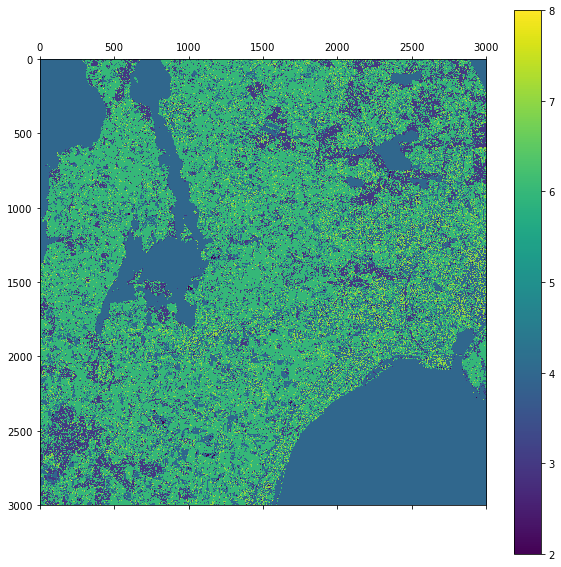

In [15]:
plot_image(test_predict)